# Exercise: Chicago Food Deserts

#### Summary

Looking at census tracts in Chicago to find food deserts - places without a good source of food.

#### Data Source(s)

All data from the city of Chicago

#### Files

- `Boundaries - Census Tracts - 2010.zip`, census tracts in Chicago from [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik)
- `Grocery_Stores_-_2013.csv`, grocery stores in Chicago from [here](https://data.cityofchicago.org/Community-Economic-Development/Grocery-Stores-2013/53t8-wyrc)

#### Data dictionary

Visit the "here" links above. Scroll down a little and click 'Show All' to see every column.

#### Skills

- Opening shapefiles
- Opening CSV files as geography
- Reprojecting
- Buffers

## Import what you'll need to do geographic work

Probably pandas, geopandas, and the shapely thing that lets you make Points

In [1]:
#shapely is under the hood for geopandas and can help us create points or polygons
#shapely is for shapes
#fiona is for reading and writing files

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import numpy as np

## Read in the census tract boundaries for Chicago

Give it a name that makes sense, like `tracts`.

In [2]:
ls "Boundaries - Census Tracts - 2010/"

geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.dbf*
geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.prj*
geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.shp*
geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.shx*


In [3]:
tracts = gpd.read_file("Boundaries - Census Tracts - 2010/geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.shp")

### Confirm that you have 10 columns and 801 rows

In [4]:
tracts.shape

(801, 10)

### What does the data look like? What columns do you have?

In [5]:
tracts.dtypes

commarea       object
commarea_n    float64
countyfp10     object
geoid10        object
geometry       object
name10         object
namelsad10     object
notes          object
statefp10      object
tractce10      object
dtype: object

In [6]:
tracts[:5]

,commarea,commarea_n,countyfp10,geoid10,geometry,name10,namelsad10,notes,statefp10,tractce10
0,44,44.0,031,17031842400,POLYGON ((-87.62404799998049 41.73021699998396...,8424,Census Tract 8424,,17,842400
1,59,59.0,031,17031840300,"POLYGON ((-87.6860799999848 41.82295600001154,...",8403,Census Tract 8403,,17,840300
2,34,34.0,031,17031841100,"POLYGON ((-87.62934700001182 41.8527970000265,...",8411,Census Tract 8411,,17,841100
3,31,31.0,031,17031841200,POLYGON ((-87.68813499997718 41.85569099999095...,8412,Census Tract 8412,,17,841200
4,28,28.0,031,17031838200,"POLYGON ((-87.66781999997529 41.8741839999791,...",8382,Census Tract 8382,,17,838200


In [7]:
tracts.crs

{'init': 'epsg:4326'}

### Plot it to see if it looks okay

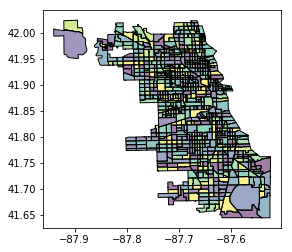

In [8]:
tracts.plot()

## Read in the grocery store data for Chicago

Note that you'll be reading in a **csv, not a shapefile**. This takes an extra conversion step to turn it into a GeoDataFrame - hopefully you have an easy cut-and-paste from last class!

Give it a name that makes sense, like `grocery_stores`.

In [9]:
ls

Boundaries - Census Tracts - 2010/    Grocery_Stores_-_2013.csv
Classwork Chicago Food Deserts.ipynb


In [10]:
grocery_stores = pd.read_csv("Grocery_Stores_-_2013.csv")

In [11]:
grocery_stores.head()

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,200 LIQUORS,48663.0,17055.0,5000.0,B,204 E 47TH ST,60653,GRAND BOULEVARD,38,3,17031381500,1.703138e+14,1.178462e+06,1.873949e+06,41.809424,-87.620952,"(41.8094238941, -87.6209518020)"
1,3600 COMMISSARY,24279.0,9830.0,3800.0,B,3600 N LAKE SHORE DR,60613,LAKE VIEW,6,46,17031060900,1.703106e+14,1.171866e+06,1.924645e+06,41.948684,-87.643650,"(41.9486836744, -87.6436497585)"
2,4343 PETES FRESH MARKET,1336669.0,260303.0,57000.0,A,4343 S PULASKI RD,60632,ARCHER HEIGHTS,57,14,17031570100,1.703157e+14,1.150448e+06,1.875370e+06,41.813914,-87.723665,"(41.8139143113, -87.7236649419)"
3,4700 PETE'S FRESH MARKET,1243125.0,245519.0,45000.0,A,4700 S KEDZIE AVE,60632,BRIGHTON PARK,58,14,17031842800,1.703184e+14,1.155792e+06,1.873271e+06,41.808047,-87.704119,"(41.8080472717, -87.7041188223)"
4,5659 W. DIVERSEY,1575023.0,277375.0,4000.0,B,5659 W DIVERSEY AVE,60639,BELMONT CRAGIN,19,30,17031190602,1.703119e+14,1.137914e+06,1.918002e+06,41.931135,-87.768612,"(41.9311354035, -87.7686121306)"


In [12]:
points = grocery_stores.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1)
grocery_stores_gdf = gpd.GeoDataFrame(grocery_stores, geometry = points)
grocery_stores_gdf.crs = {'init': 'epsg:4326'}
grocery_stores_gdf.to_crs(tracts.crs, inplace=True)

In [13]:
grocery_stores_gdf.crs

{'init': 'epsg:4326'}

In [14]:
tracts.crs

{'init': 'epsg:4326'}

### Confirm that you have 506 rows

In [15]:
grocery_stores_gdf.shape

(506, 18)

### Plot to make sure it looks okay

## Plot the grocery stores on top of the census tracts.

- Make it look somewhat nice, with a nice grey background and grocery stores that stand out.
- Be sure the CRSes are the same!

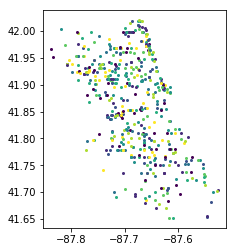

In [16]:
grocery_stores_gdf.plot()

(-87.96107629997519, -87.50283170000732, 41.62530410001137, 42.042905899965575)

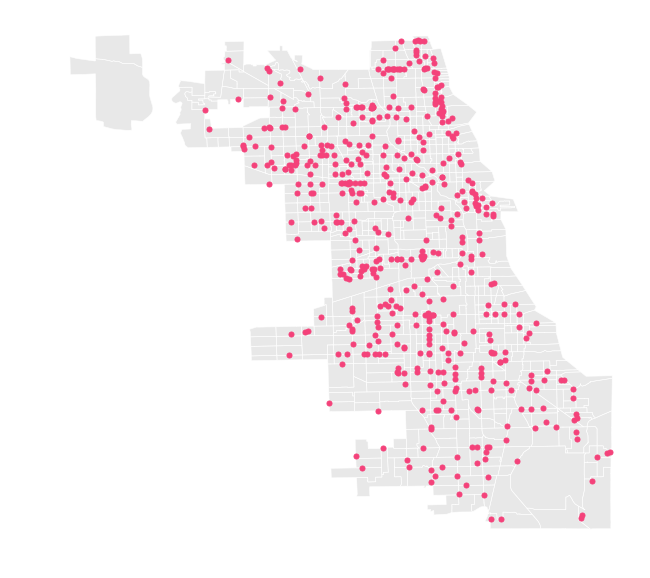

In [17]:
ax = tracts.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
grocery_stores_gdf.plot(ax=ax, color='#f4427a', markersize=5)
ax.axis("off")

(-87.96107629997519, -87.50283170000732, 41.62530410001137, 42.042905899965575)

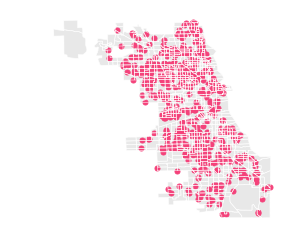

In [18]:
#be careful when you layer stuff, if we plot tracts last it would be superimposed on top of grocery stores
ax = grocery_stores_gdf.plot(color='#f4427a', markersize=5)
tracts.plot(ax=ax, color="lightgrey",edgecolor="white", linewidth=0.5)
ax.axis("off")

## Which census tracts don't have a grocery store?

Just in case you forgot, `~` means "does NOT" in pandas. So for example, you might think the following code means **"plot all of the tracts that do NOT contain a grocery store"**.

```pyhon
tracts[~tracts.contains(grocery_stores)].plot()
```

Try it. It doesn't work.

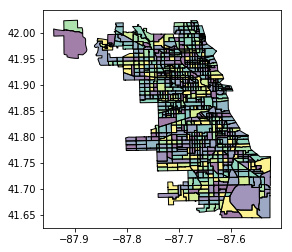

In [19]:
tracts[~tracts.contains(grocery_stores_gdf)].plot()

It actually means **"plot all of the tracts that do not contain *every* grocery store"**. Since no census tract contains every grocery store, it won't work.

## Geographic relationships

There are [a lot of other spatial relationships](http://geopandas.org/reference.html), such as:

Versions that makes sense:

* **contains:** has the other object TOTALLY INSIDE  (boundaries can't touch!!!) "a neighborhood CONTAINS restaurants"
* **within:** is TOTALLY INSIDE of the other object "a restaurant is WITHIN a neighborhood"
* **intersects:** is OVERLAPPING, boundaries and interiors touching
* **disjoint:** no touching!!! no intersecting!!!!
* **touches:** only the boundaries touch, like a tangent
* **crosses:** goes through but isn't inside - "a river crossing through a city"

### Plot the census tracts that do not contain ANY grocery stores

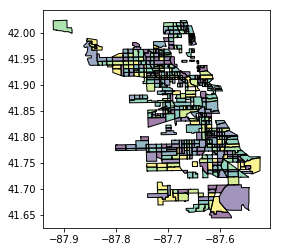

In [20]:
tracts[tracts.disjoint(grocery_stores_gdf)].plot()

**But wait: that's not what we're doing!** We're interested in (kind of) people who are **half a mile** from a grocery store.

## Which census tracts are far from a grocery store? Introducing buffer!

`.buffer()` draws a buffer around a point, line, or shape. You can use it to say, "show me things within XXX distance of YYY". Try to take the grocery stores, draw a half-mile buffer around them, and plot it.

**It won't look pretty.**

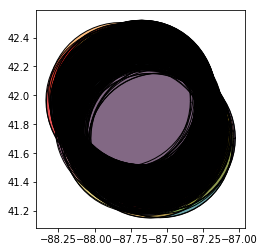

In [21]:
grocery_stores_gdf.buffer(0.5).plot()

## That... doesn't work.

Unfortunately `.buffer` uses the units of the current CRS, and the current CRS is **EPSG:4326**. What units is it using? You'll need to ask Google.

In [22]:
#units are in degrees but we don't want degrees
grocery_stores_gdf.crs

{'init': 'epsg:4326'}

## Reprojecting to be able to use meters

Luckily we can use Mercator, the projection we should all dislike because it looks so ugly, to get units of meters.

You can use the epsg of `3395` if you'd like, or use `{'proj': 'merc'}` - either one is fine.

**How many meters is half a mile?**

- Reproject grocery stores to be Mercator (permanently)
- Create a half-mile buffer, 
- and map it.

Same thing:

* `grocery_stores.to_crs({'proj': 'merc'}).buffer(800).plot()`
* `grocery_stores.to_crs(epsg=3395).buffer(800).plot()`

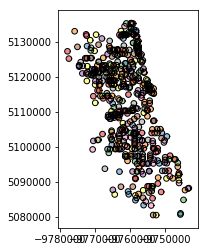

In [23]:
#convert to meters
grocery_stores_gdf.to_crs({'proj': 'merc'}).buffer(800).plot()

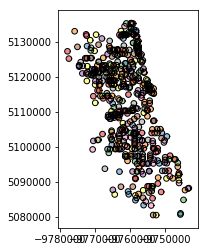

In [24]:
#exactly the same thing
grocery_stores_gdf.to_crs(epsg=3395).buffer(800).plot()

# "no system file 2" or whatever 
# means you typed ESPG 😢 
# instead of EPSG 😄
# EUROPEAN! PETROLEUM!
# SURVEY! GROUP!

## Finding our food deserts

First, make a map of **every census tract** and **every grocery store**, along with a **buffer zone** around the grocery stores. You'll need to make sure they're in the **same projection**, and you might want to save the buffer to a new variable (`buffered_grocery_stores`, maybe?). You'll also probably want the buffer zone to be plotted with `alpha=0.5` or something like that to make it a bit transparent.

Actually, just **permanently reproject `tracts` to be Mercator**.

In [25]:
grocery_stores = grocery_stores_gdf.to_crs({'proj': 'merc'})
tracts = tracts.to_crs({'proj': 'merc'})

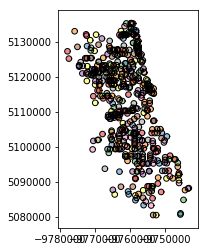

In [26]:
buffered_grocery_stores = grocery_stores.buffer(800)
buffered_grocery_stores.plot(alpha=0.5)

## Now add to that the census tracts that do NOT touch one of our buffers.

It... doesn't seem to look right, once again.

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

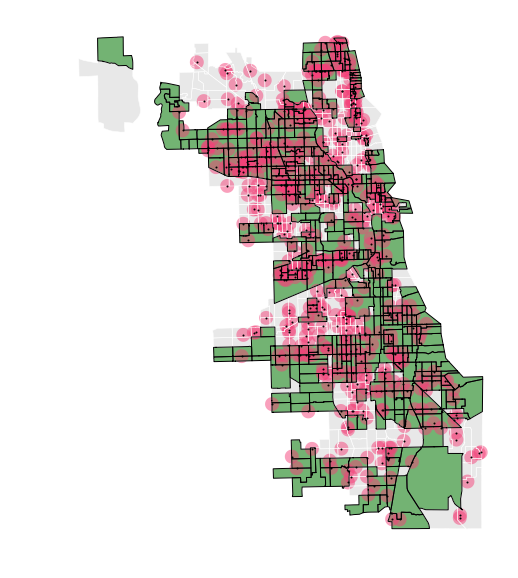

In [27]:
ax = tracts.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
tracts[tracts.disjoint(buffered_grocery_stores)].plot(ax=ax, color="green")
buffered_grocery_stores.plot(ax=ax, color='#f4427a', markersize=5, linewidth=0, alpha=0.5)
grocery_stores.plot(ax=ax, color="black", markersize=1, linewidth=0)
ax.axis("off")

In [28]:
buffered_grocery_stores.head()

0    POLYGON ((-9753119.737420607 5103981.778572024...
1    POLYGON ((-9755646.462380236 5124725.204320104...
2    POLYGON ((-9764553.711852053 5104649.938418441...
3    POLYGON ((-9762377.847771194 5103776.950972501...
4    POLYGON ((-9769557.210010724 5122108.793547577...
dtype: object

## The sad way of doing it

If you want to do this right, we need to do it **one tract at a time**, and say "hey, do you intersect with any buffers?"

First, let's pull out a single tract.

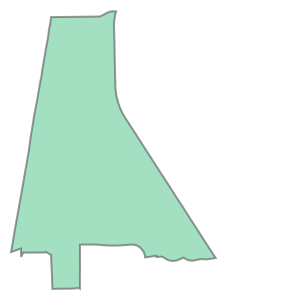

In [29]:
#let's pull one tract out with .loc[]
tract8 = tracts.loc[8]
tract8.geometry

Then, ask it which grocery store buffers it interacts with. **I'm using `.head()` so I don't have to see a big long list**.

In [30]:
buffered_grocery_stores.head().intersects(tract8.geometry)

0    False
1    False
2    False
3    False
4    False
dtype: bool

Instead of a big long list of `True` and `False` for every single comparison, I can say **"hey, were any of those True?"**

In [31]:
#tract8 intersects with 4 grocery store buffers
buffered_grocery_stores.intersects(tract8.geometry).value_counts()

False    502
True       4
dtype: int64

### Using .intersects and .any() with a .apply

So now we get to the real ugly part: go through every single tract, see if it intersects, and map accordingly.

In [32]:
#geometry for the first five tracts
tracts.head().geometry

0    POLYGON ((-9754264.404603189 5092203.790407264...
1    POLYGON ((-9761169.775256557 5105995.456236381...
2    POLYGON ((-9754854.286588391 5110437.534010591...
3    POLYGON ((-9761398.53680929 5110868.440691042,...
4    POLYGON ((-9759137.081353614 5113622.448989172...
Name: geometry, dtype: object

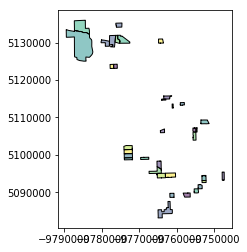

In [33]:
# returns YES if the row intersects with ANY of the buffered grocery stores
def does_intersect(row):
    return buffered_grocery_stores.intersects(row.geometry).any()

# Go through every row, testing for an intersection
# notice the ~ to make it negative
tracts[~tracts.apply(does_intersect, axis=1)].plot()

## Stop crying, please: we can fix this with `.unary_union`

The problem right now is that we're comparing **every single tract** to **every single buffer**. But what if there was only **one buffer** instead of a few hundred?

In [34]:
#how many buffers do we have?
buffered_grocery_stores.shape

(506,)

In [35]:
buffered_grocery_stores.head()

0    POLYGON ((-9753119.737420607 5103981.778572024...
1    POLYGON ((-9755646.462380236 5124725.204320104...
2    POLYGON ((-9764553.711852053 5104649.938418441...
3    POLYGON ((-9762377.847771194 5103776.950972501...
4    POLYGON ((-9769557.210010724 5122108.793547577...
dtype: object

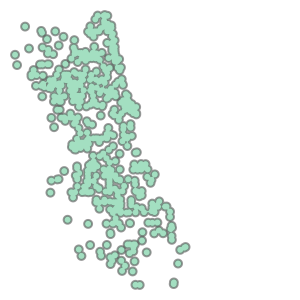

In [36]:
#we can combine all the buffers into one shape using .unary_union
buffered_grocery_stores.unary_union

Look at that!!!! **`.unary_union`** takes a bunch of polygons or whatever and turns them into ONE NICE SIMPLE POYLGON.

And we can use that with our `.intersects` now, really super easily.

In [37]:
tracts.intersects(buffered_grocery_stores.unary_union)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
771     True
772     True
773     True
774     True
775     True
776     True
777     True
778     True
779     True
780     True
781     True
782     True
783     True
784     True
785     True
786     True
787     True
788     True
789     True
790     True
791     True
792     True
793     True
794     True
795     True
796     True
797     True
798    False
799     True
800     True
Length: 801, dtype: bool

In [38]:
tracts.disjoint(buffered_grocery_stores.unary_union)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
771    False
772    False
773    False
774    False
775    False
776    False
777    False
778    False
779    False
780    False
781    False
782    False
783    False
784    False
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792    False
793    False
794    False
795    False
796    False
797    False
798     True
799    False
800    False
Length: 801, dtype: bool

## Plot that on top of the map you made before, with all of the circles

You'll want to do it AFTER you plot all of the tracts but BEFORE you plot the grocery stores.

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

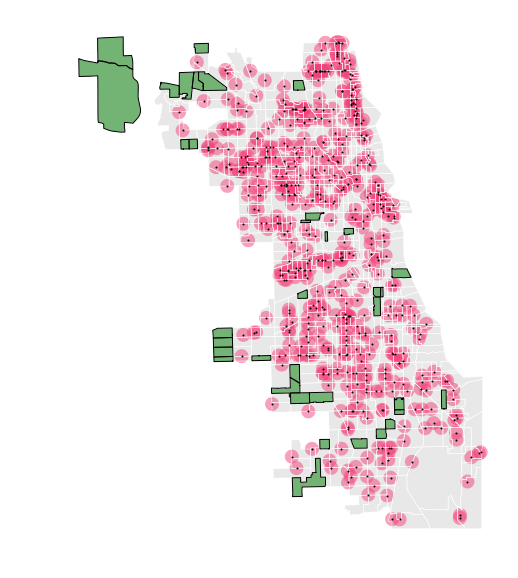

In [39]:
ax = tracts.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
tracts[tracts.disjoint(buffered_grocery_stores.unary_union)].plot(ax=ax,color="green")
buffered_grocery_stores.plot(ax=ax, color='#f4427a', markersize=5, linewidth=0)
grocery_stores.plot(ax=ax, color="black", markersize=1, linewidth=0)
ax.axis("off")

#is the tract touching the grocery store buffer? if it is, it's not considered a food desert

## Okay actually though I have bad news

Usually when you do these comparisons, you aren't saying "does ANY part of this census tract touch a buffer zone," you're saying "does the CENTER of this census tract touch a buffer zone?"

**How do we find the center of the census tracts?** It isn't terrible, really.

## Getting the center of the census tracts

The important thing is that they aren't called centers, they're called **centroids**.

And you find them by just typing....... `centroid`.

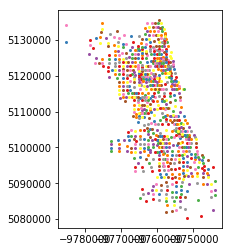

In [40]:
tracts.centroid.plot()

## Which centroids aren't inside of a buffer?

Well, we do the exact same as before, but we ask something like "which centroids are NOT within the grocery store buffer zone?", and then we feed that right back to `tracts`.

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

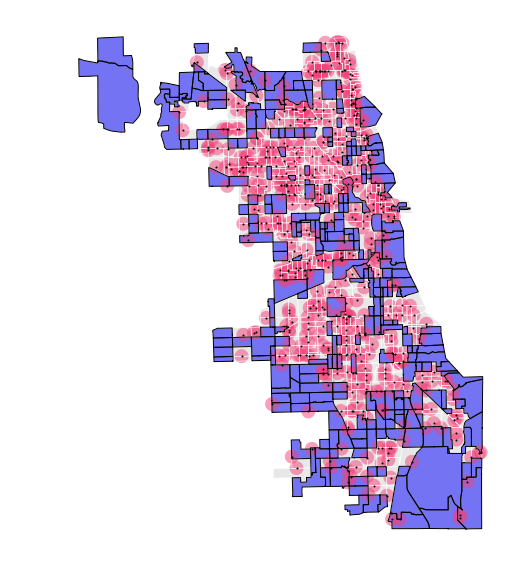

In [46]:
ax = tracts.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
tracts[tracts.centroid.disjoint(buffered_grocery_stores.unary_union)].plot(ax=ax, color="blue")
buffered_grocery_stores.plot(ax=ax, color='#f4427a', markersize=5, linewidth=0)
grocery_stores.plot(ax=ax, color="black", markersize=1, linewidth=0)
ax.axis("off")

#is the center of the tract touching the grocery store buffer? if it is, it's not considered a food desert

## And then we just map it all over again

In [42]:
#examine the reasons why an area may have a food desert 
#predominantly minority areas? poor areas? development barriers?

## And if we want to get technical and make your brain hurt more

There are two kinds of grocery stores, A and B, and B should have a half-mile radius and A should have a one-mile radius.

In [43]:
def make_fancy_buffer(row):
    if row['BUFFER SIZE'] == 'A':
        return row.geometry.buffer(1600)
    elif row['BUFFER SIZE'] == 'B':
        return row.geometry.buffer(800)
    
fancy_buffer = grocery_stores.apply(make_fancy_buffer, axis=1)

# We need to convert it into a GeoSeries because pandas thinks its a normal series
fancy_buffer = gpd.GeoSeries(fancy_buffer)

### Make the many-layered map again, but this time use `fancy_buffer` instead of `grocery_stores_buffer`

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.650753337,
 5139015.647636042)

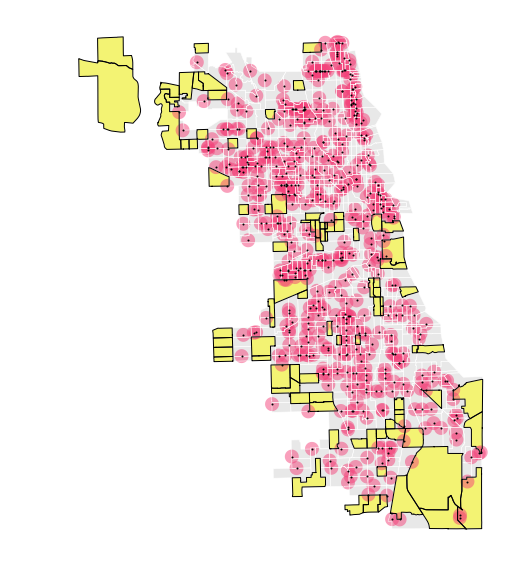

In [45]:
ax = tracts.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
tracts[tracts.centroid.disjoint(fancy_buffer.unary_union)].plot(ax=ax, color="yellow")
buffered_grocery_stores.plot(ax=ax, color='#f4427a', markersize=5, linewidth=0)
grocery_stores.plot(ax=ax, color="black", markersize=1, linewidth=0)
ax.axis("off")